In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV 


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA


In [5]:
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("C:\\Users\\jashw\\Documents\\STUDY MATERIAL\\Btech\\V-SEM\\INTRN\\CODER'S CAVE\\CANSER\\Breast_cancer_data.csv",encoding='latin1')
df.head(8)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0


In [6]:
df.shape


(569, 6)

In [7]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
df = df.dropna(axis=1)

In [9]:
df.shape

(569, 6)

In [10]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [12]:

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[  1 186 324 297  60 107 282 313 349 407 391 189 418 403 378 451 287 306
 364  61 108  16  59 384 330 133 336 293 432  85 426 229 405 440 188 341
 345 216 429 312 340 328 419 295 348 179 146 227  66 368 342 130 208 229
 358 230 222 341 253   8  77 316 364  47 399 402 319 243 168 135 327  67
 413 111 136 269   6 123 404 194 315 114 421 439 102 220 333 415 347  91
 406 381  73 210 276 383 187 279  20 274 422  40 299 259 252  99 212 221
 271 325 151 310 269 289 113 336 110 140 382 283   3 157 290   4 132 162
 417 239 132 427  36 261 337  49 354 373 140  93 178  39  10 197 167 117
  82  68 138 231  89 190 311 307  92  27  92 193 309 260  18  24 288 118
 202 365 359 273   0 232 416 150  15 268   9  71  88  64 198 286 365  26
 351 441 296  78 371  87 223 160 171 115 387 331 207 445 389 129 367 350
 374 292 264 254 443 396 225 141 165 294 376  23 363 240 218 436 398 148
 213 174 338 475  31  48 176 293 153  42  95  98 404 369 245 449 477 453
 116 324 446 333 454 478 100  84 206 397 394 277 17

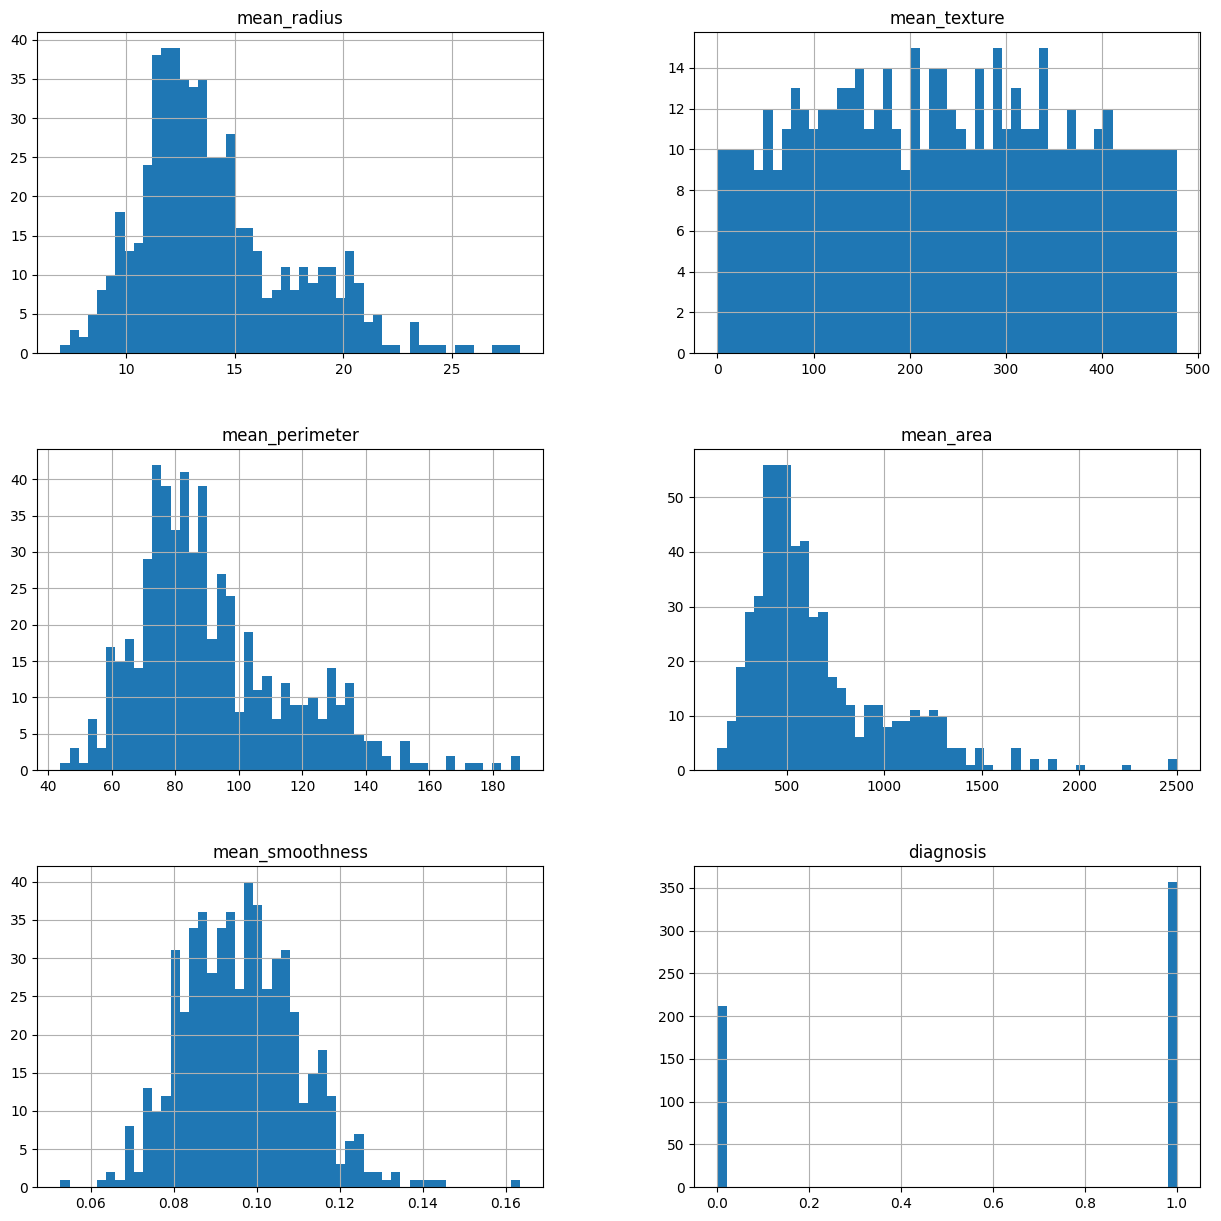

In [13]:
df.hist(bins = 50, figsize = (15,15))
plt.show()

In [14]:
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,1.0,122.80,1001.0,0.11840,0
1,20.57,186.0,132.90,1326.0,0.08474,0
2,19.69,324.0,130.00,1203.0,0.10960,0
3,11.42,297.0,77.58,386.1,0.14250,0
4,20.29,60.0,135.10,1297.0,0.10030,0


In [15]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.348567,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.348567,1.000000,0.355830,0.345076,0.002182,-0.458623
mean_perimeter,0.997855,0.355830,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.345076,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,0.002182,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.458623,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

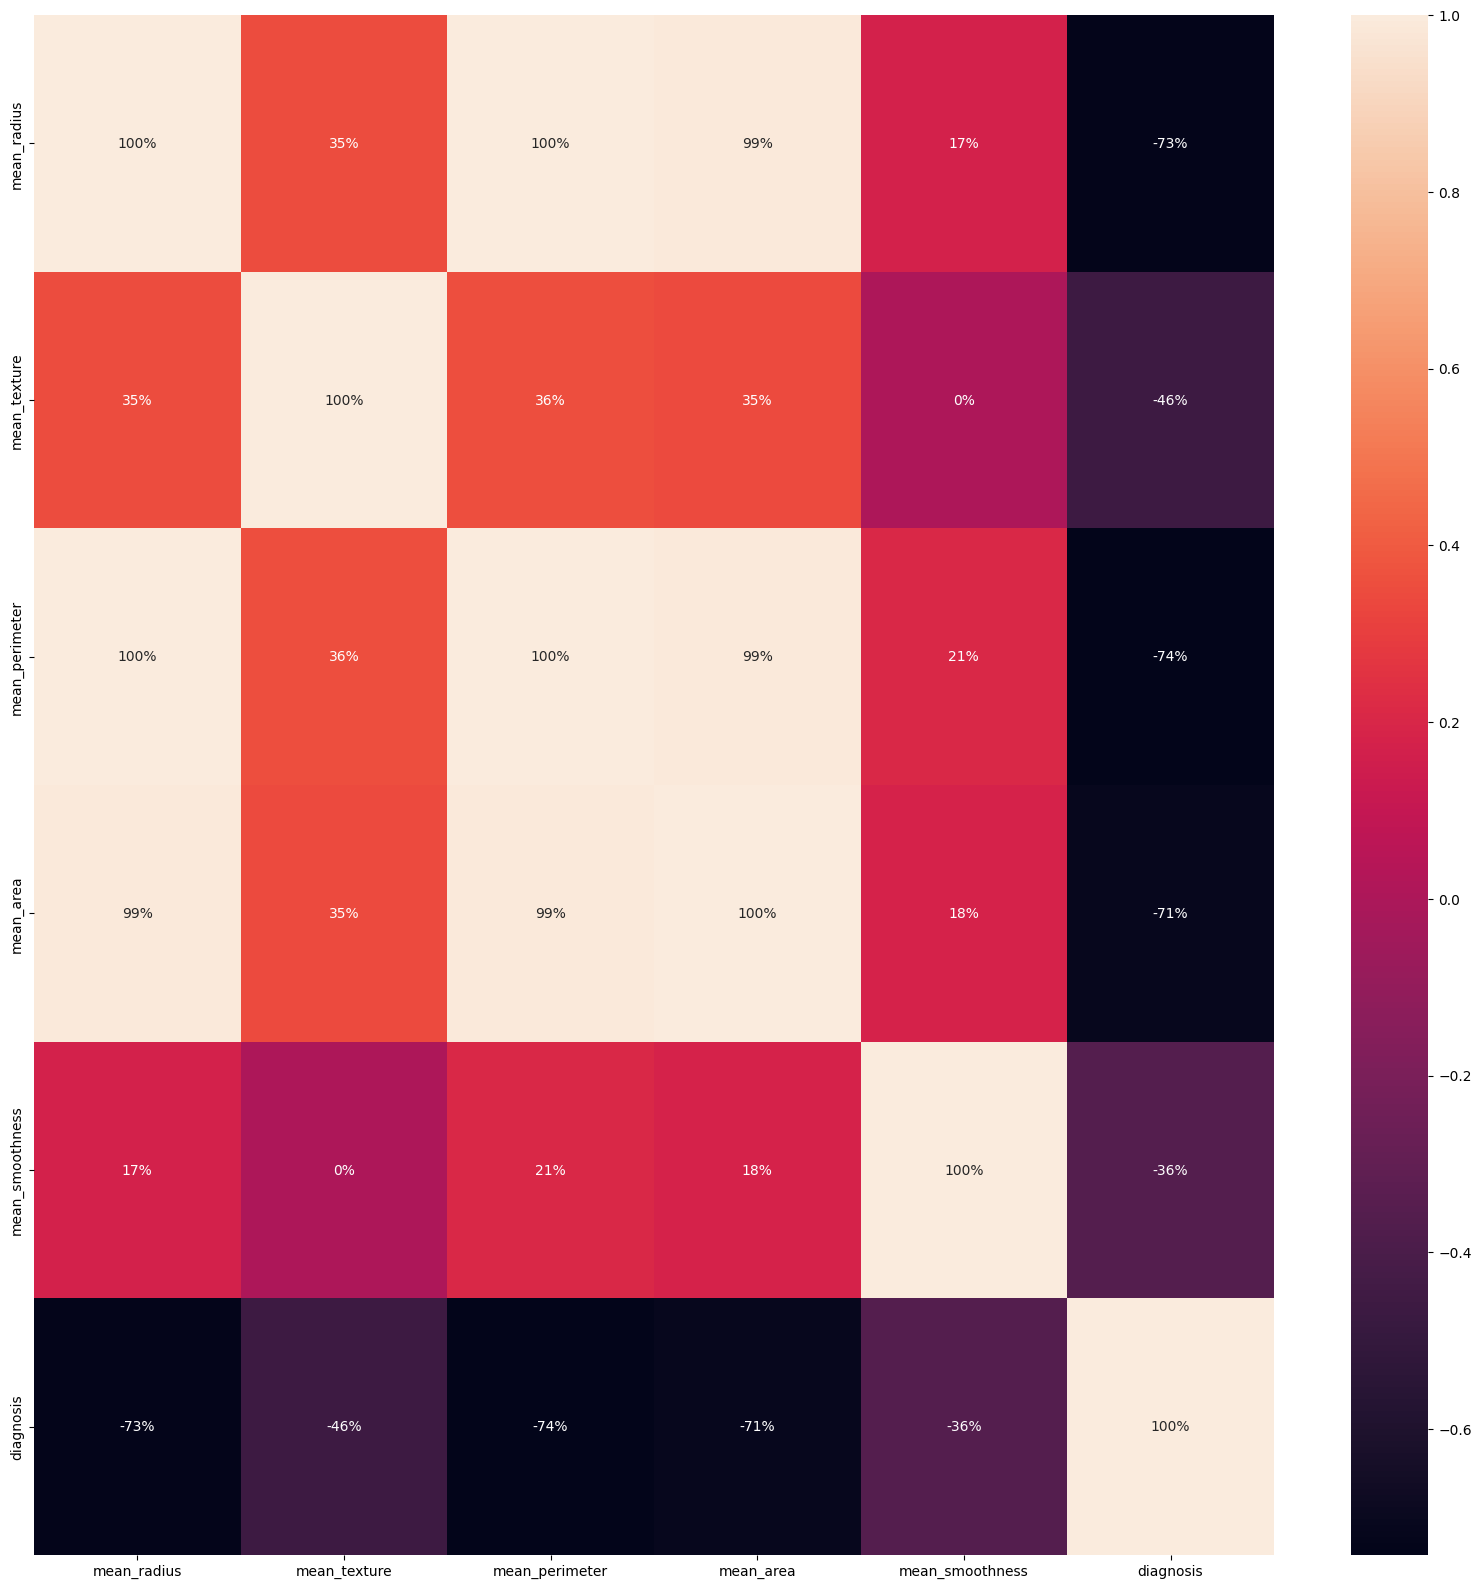

In [16]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [17]:
X = df.iloc[:, 2:31].values 
Y = df.iloc[:, 1].values 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
def models(X_train,Y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [21]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.03990610328638498
[1]K Nearest Neighbor Training Accuracy: 0.215962441314554
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.08215962441314555
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.035211267605633804
[4]Gaussian Naive Bayes Training Accuracy: 0.8356807511737089
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9835680751173709


In [22]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[0] Testing Accuracy = "nan!"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[1] Testing Accuracy = "nan!"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[2] Testing Accuracy = "nan!"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[3] Testing Accuracy = "nan!"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[4] Testing Accuracy = "nan!"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[5] Testing Accuracy = "nan!"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00       1.0
         5.0       0.00      0.00      0.00       1.0
         6.0       0.00      0.00      0.00       1.0
         9.0       0.00      0.00      0.00       1.0
        10.0       0.00      0.00      0.00       1.0
        13.0       0.00      0.00      0.00       1.0
        15.0       0.00      0.00      0.00       1.0
        16.0       0.00      0.00      0.00       1.0
        17.0       0.00      0.00      0.00       1.0
        21.0       0.00      0.00      0.00       1.0
        24.0       0.00      0.00      0.00       2.0
        25.0       0.00      0.00      0.00       1.0
        26.0       0.00      0.00      0.00       1.0
        28.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        44.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       0.0
        50.0      

In [24]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[ 48. 457. 159. 144. 253. 277.  55.  20. 414.  95. 287. 423. 455. 232.
 341. 165. 110. 305. 427.  60.  41. 330. 230. 164. 299. 164.  75. 412.
 339. 293. 469. 359. 457. 293. 219.  37. 339. 475.  72. 276.  23.  62.
 403. 452. 339. 425.  62.  22. 201. 341. 464. 364. 282. 342. 215.  78.
 237.  54.  54. 163.  32. 107. 468. 465. 147.  18. 366. 156. 305.  48.
  89. 352.  65. 147. 426. 129. 316. 108. 280. 113. 290. 335. 281.  19.
 107. 185. 461. 434. 156. 335. 211. 358. 231. 276. 168. 151. 293. 117.
 342. 315.   8. 115.  70.  89. 175.  48.   1.  37.  23.  85.  37. 238.
 229. 150. 265.  14. 107.  66.  54. 339. 342. 225. 274. 234. 448. 120.
 345.  27. 452. 408. 456. 198.  46. 210.  78. 342.  70. 358. 276. 298.
 115. 237. 238.]

[299. 431. 103. 204. 216. 226. 380. 247. 435.  71.  50. 406. 343. 260.
  91.   9. 238. 453. 389. 395. 229. 231.  52. 240.  86.   5.  24. 378.
 150. 332.  26. 186. 309. 337.  10. 399. 153. 239. 149. 437. 470.  96.
 391. 131. 287. 370.  64. 324. 171. 451. 418. 389. 354. 214

-------------------------Accuracy Score---------------------------------
0.0
-------------------------Classification Report---------------------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       1.0
         5.0       0.00      0.00      0.00       1.0
         6.0       0.00      0.00      0.00       1.0
         9.0       0.00      0.00      0.00       1.0
        10.0       0.00      0.00      0.00       1.0
        13.0       0.00      0.00      0.00       1.0
        15.0       0.00      0.00      0.00       1.0
        16.0       0.00      0.00      0.00       1.0
        17.0       0.00      0.00      0.00       1.0
        21.0       0.00      0.00      0.00       1.0
        24.0       0.00      0.00      0.00       2.0
        25.0       0.00      0.00      0.00       1.0
        26.0       0.00      0.00      0.00       1.0
        28.0       0.00      0.00     

<Axes: >

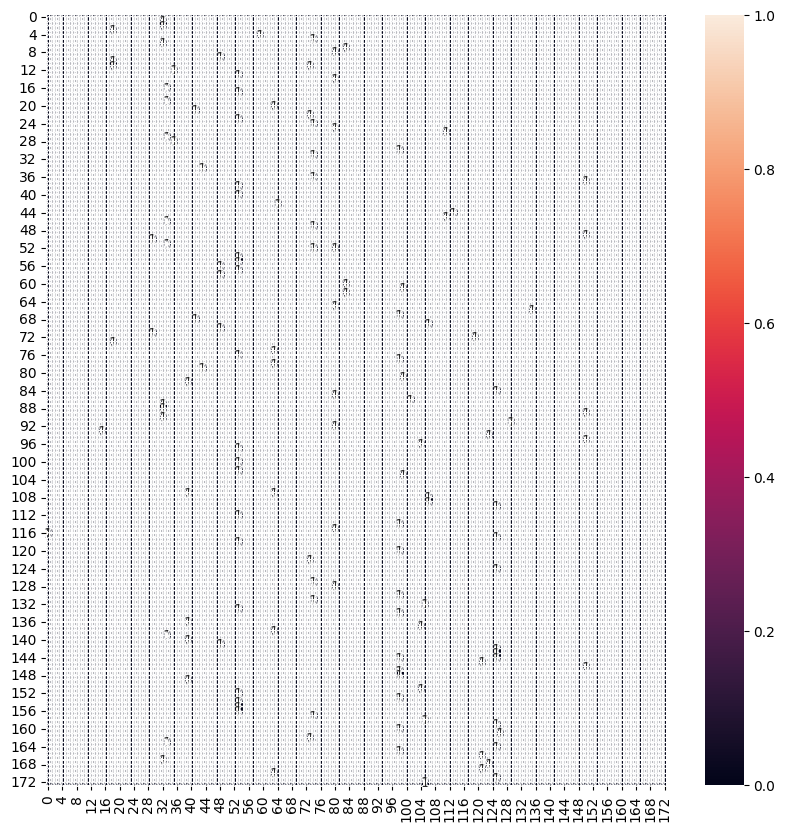

In [25]:
#support vector machine
from sklearn.svm import SVC
supportvectormachine = SVC(kernel = 'linear', random_state = 0)
supportvectormachine.fit(X_train, Y_train)

Y_pred = supportvectormachine.predict(X_test)

print("-------------------------Accuracy Score---------------------------------")
print(accuracy_score(Y_test, Y_pred))
print("-------------------------Classification Report---------------------------")
print(classification_report(Y_test, Y_pred))
print("------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True)


In [27]:
df = df.rename(columns = {"diagnosis":"target"})

target
1    357
0    212
Name: count, dtype: int64


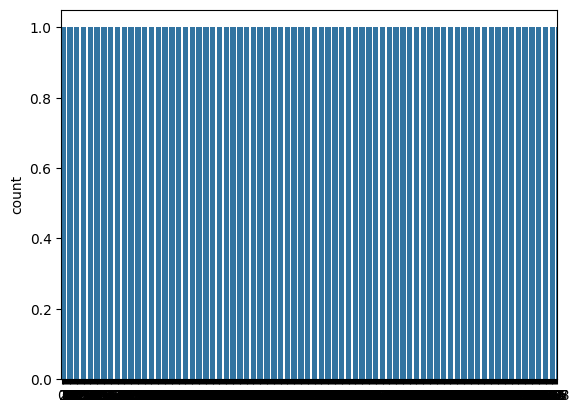

In [28]:
sns.countplot(df["target"])
print(df.target.value_counts()) 



In [29]:
describe = df.describe()

In [31]:
corr_matrix = df.corr()

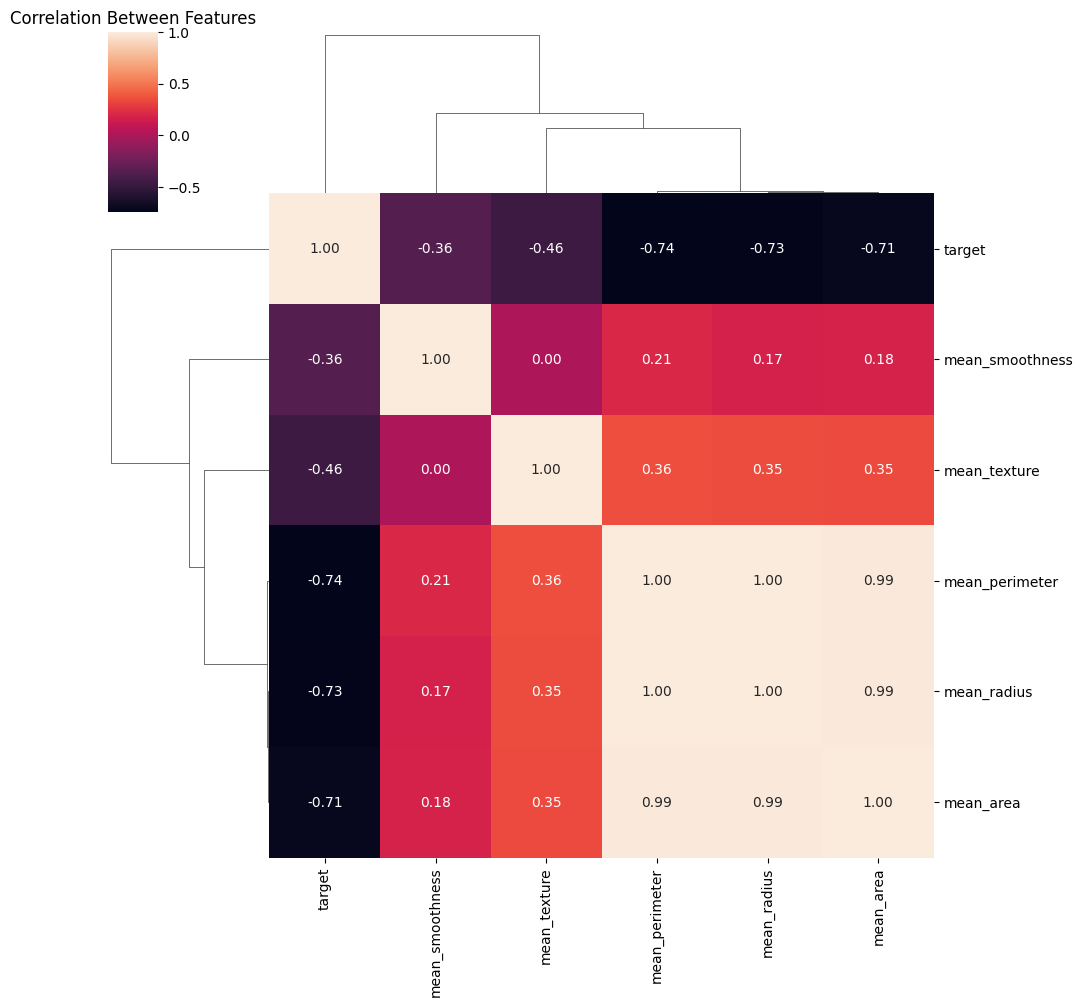

In [32]:
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

In [44]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,target
0,17.99,1.0,122.80,1001.0,0.11840,0
1,20.57,186.0,132.90,1326.0,0.08474,0
2,19.69,324.0,130.00,1203.0,0.10960,0
3,11.42,297.0,77.58,386.1,0.14250,0
4,20.29,60.0,135.10,1297.0,0.10030,0


In [42]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
target             0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   target           569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [46]:

df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,236.855888,91.969033,654.889104,0.096360,0.627417
std,3.524049,133.385694,24.298981,351.914129,0.014064,0.483918
min,6.981000,0.000000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,125.000000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,235.000000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,347.000000,104.100000,782.700000,0.105300,1.000000
max,28.110000,478.000000,188.500000,2501.000000,0.163400,1.000000


In [47]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
target             0
dtype: int64

In [48]:
df = df.dropna(axis=1)
     

In [51]:
x_train, y_train = df[df.columns[1:]],df[df.columns[0]]

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,13))
axes = axes.ravel()
i = 0
for idx,ax in enumerate(axes):
  if x_train_free[x_train_free.columns[idx]].skew() > 1 : color="#ffa500"
  else : color="b"
  ax.figure
  ax.hist(x_train_free[x_train_free.columns[idx]],bins= 50, color=color)
  ax.set_title(x_train_free.columns[idx])
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'colour'